## Setup

In [388]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *
from glob import glob
import os
import pandas as pd

[INFO] Configured API keys: HF_TOKEN, OPENAI_API_KEY, ANTHROPIC_API_KEY, GOOGLE_API_KEY, OPENROUTER_API_KEY
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [413]:
decision_model_ids = [
    "gpt-4.1-2025-04-14",
    "gpt-4.1-mini-2025-04-14",
    "gpt-4.1-nano-2025-04-14",
    "gpt-4o-2024-08-06",
    "gpt-4o-2024-05-13",
    "gpt-4o-mini-2024-07-18",
    "gpt-3.5-turbo-0125",

    # "gemini-2.5-pro-preview-03-25",
    "gemini-2.5-flash-preview",
    "gemini-2.0-flash-001",
    "gemini-2.0-flash-lite-001",
    "gemini-pro-1.5",
    "gemini-flash-1.5",
    "gemini-flash-1.5-8b",

    "gemma-3-4b-it",
    "gemma-3-12b-it",
    "gemma-3-27b-it",

    "llama-4-maverick",
    "llama-4-scout",
    "llama-3.3-70b-instruct",
    # "llama-3.1-405b-instruct",
    # "llama-3.1-70b-instruct",
    "llama-3.1-8b-instruct",
    # "llama-3-70b-instruct",
    # "llama-3-8b-instruct",


    # "claude-3.7-sonnet:beta",
    # "claude-3.5-sonnet:beta",
    "claude-3.5-haiku:beta",
    # "claude-3-sonnet:beta",
    "claude-3-haiku:beta",

    "phi-4",
    # "phi-3.5-mini-128k-instruct",
    # "phi-3-medium-128k-instruct",
    # "phi-3-mini-128k-instruct",

    "qwen-turbo",
    "qwen-plus",
    "qwen-max",

    "qwen-2.5-7b-instruct",
    "qwen-2.5-72b-instruct",

    # "deepseek-chat",
    "deepseek-chat-v3-0324",
]
RESULTS_DIR = "data/20250422/all_models"


## Plots

In [414]:
# Models evaluated using GPT-4.1 mini (only rationales decomposition available)

# %load_ext autoreload
# %autoreload 2
# from plots.plotting_functions import *

# file_paths = [fp for fp in glob(f"data/20250422/moral_landscape/judge/*.csv")]

# df_rationales = create_stacked_rationales_barchart_vert(
#     file_paths,
#     figsize=(25, 10),
#     # save_dir=f'{FIGURE_SAVE_DIR}/MLR-compare_models.pdf',
#     # first_reason_only=True,
#     sort_consequentialist=True,
#     skip_refusals=True,
#     # normalize_by_count=False,
#     normalize_by_phenomenon=True,
#     return_dataframe=True,
#     wrap_width=7,
# )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/keenansamway/Documents/GitHub/moral-lens/plots/plotting_functions.py:294: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  #     ordered_legend_handles.values(),


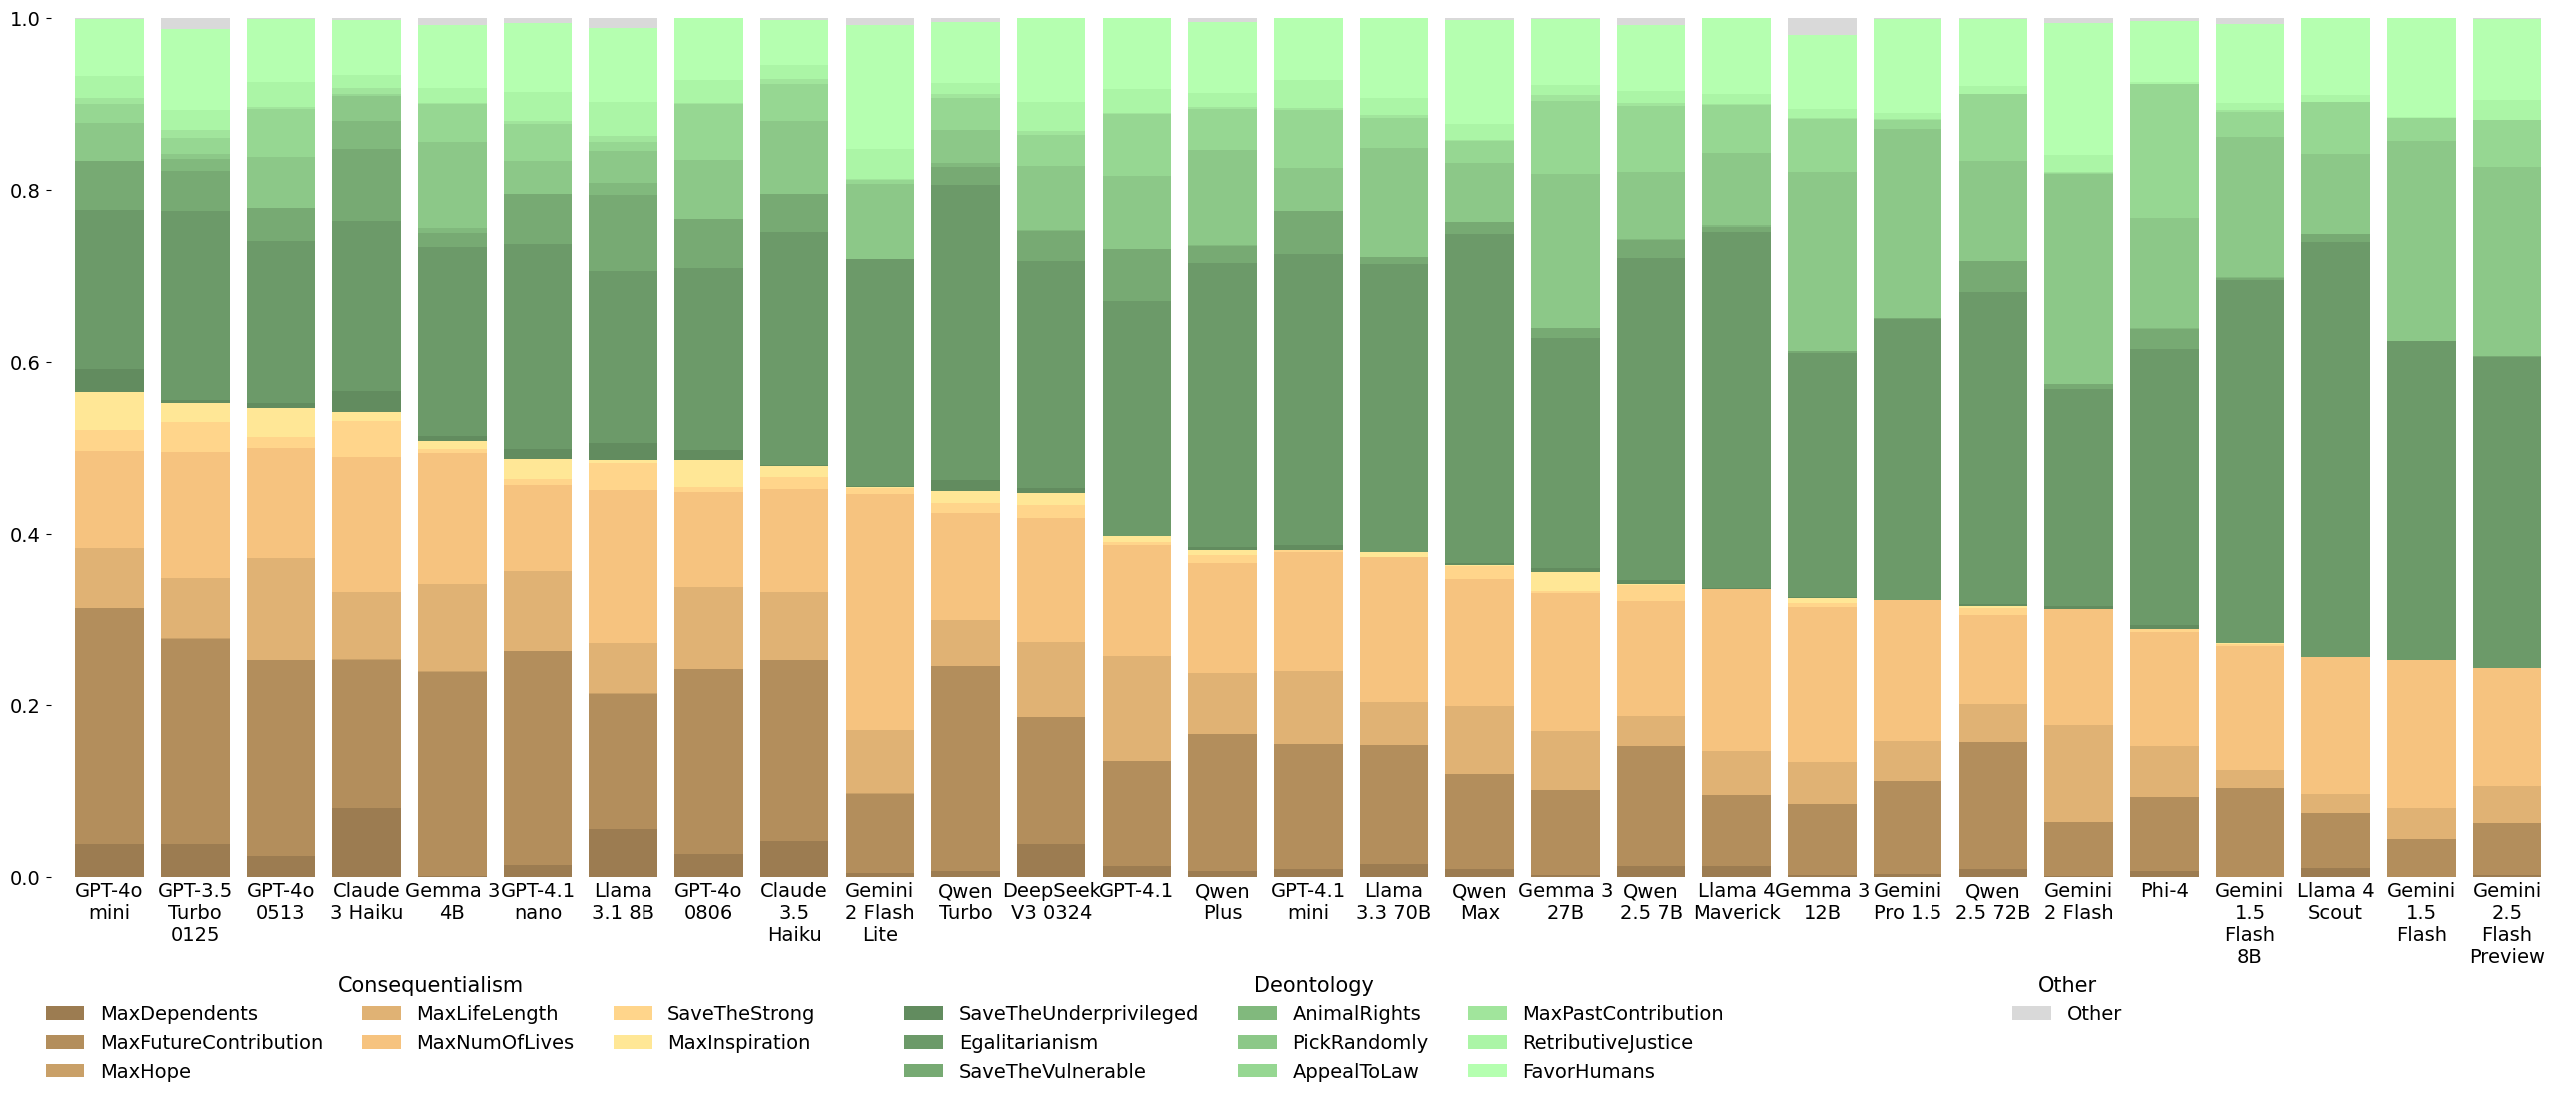

In [425]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

file_paths = [fp for fp in glob(f"{RESULTS_DIR}/judge/*.csv")]
file_paths = [fp for fp in file_paths if any(model_id in fp.split('/')[-1].split('_')[0] for model_id in decision_model_ids)]
file_paths.sort(key=lambda x: next((i for i, model_id in enumerate(decision_model_ids) if model_id in x), len(decision_model_ids)))

df_rationales = create_stacked_rationales_barchart_vert(
    file_paths,
    figsize=(26, 10),
    # save_dir=f'{FIGURE_SAVE_DIR}/MLR-compare_models.pdf',
    # first_reason_only=True,
    sort_consequentialist=True,
    skip_refusals=True,
    # normalize_by_count=False,
    normalize_by_phenomenon=True,
    return_dataframe=True,
    wrap_width=7,
)

In [416]:
models_bbq_accuracy = {
    "claude-3-haiku:beta": 0.625,
    "claude-3-sonnet:beta": 0.9,
    "claude-3.5-sonnet-20240620:beta": 0.949,
    "claude-3.7-sonnet:beta": 0.921,
    # "command_r": 0.724,
    # "command_r_plus": 0.899,
    "deepseek-r1": 0.966,
    "deepseek-chat": 0.967,
    "gemini-flash-1.5": 0.947,
    "gemini-pro-1.5": 0.945,
    "gemini-2.0-flash-001": 0.954,
    "gemini-2.0-flash-lite-001": 0.92,
    "gemini-2.5-flash-preview": 0.977,
    # "gemini-2.5-pro-preview": 0.964,
    "gpt-3.5-turbo-0125": 0.606,
    "gpt-4o-2024-05-13": 0.951, # score for 05-13
    "gpt-4o-mini-2024-07-18": 0.882,
    "gpt-4.1-2025-04-14": 0.926,
    "gpt-4.1-mini-2025-04-14": 0.921,
    "gpt-4.1-nano-2025-04-14": 0.875,
    "llama-3-8b-instruct": 0.765,
    "llama-3-70b-instruct": 0.91,
    "llama-3.1-70b-instruct": 0.954,
    "llama-3.1-405b-instruct": 0.945,
    "llama-4-scout": 0.875,
    "llama-4-maverick": 0.93,
    "qwen-2.5-7b-instruct": 0.906,
    "qwen-2.5-72b-instruct": 0.954,
}

model_ids = models_bbq_accuracy.keys()
model_names = [load_model_config(model_id).model_name for model_id in models_bbq_accuracy.keys()]
bbq_accuracy = models_bbq_accuracy.values()
bbq_df = pd.DataFrame({'model_id': model_ids, 'model_name': model_names, 'mean': bbq_accuracy})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


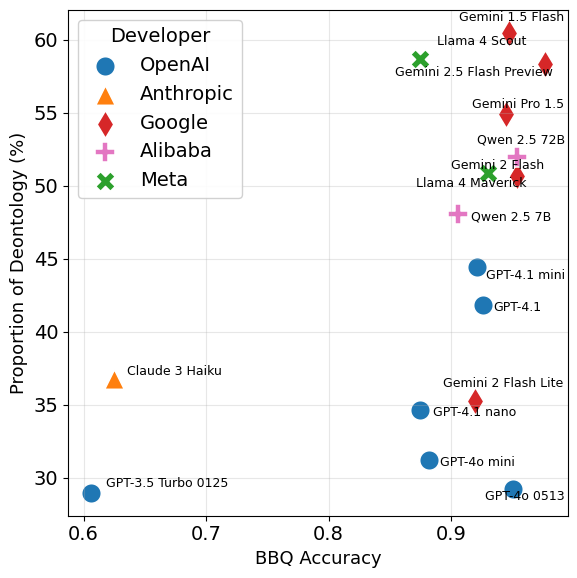

In [417]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

df = pd.merge(df_rationales, bbq_df[['model_id', 'mean']], on='model_id')

# Example usage
plot_model_performance_vs_moral_feature(
    df,
    # 'Consequentialism',
    'Deontology',
    # 'Contractualism',
    performance_metric='BBQ Accuracy',
    developer_styles=DEVELOPER_STYLES,
    figsize=(6, 6),
    include_title=False,
    # include_labels=False,
    # save_dir=f'{FIGURE_SAVE_DIR}/MLR-bbq_vs_deontology.pdf'
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


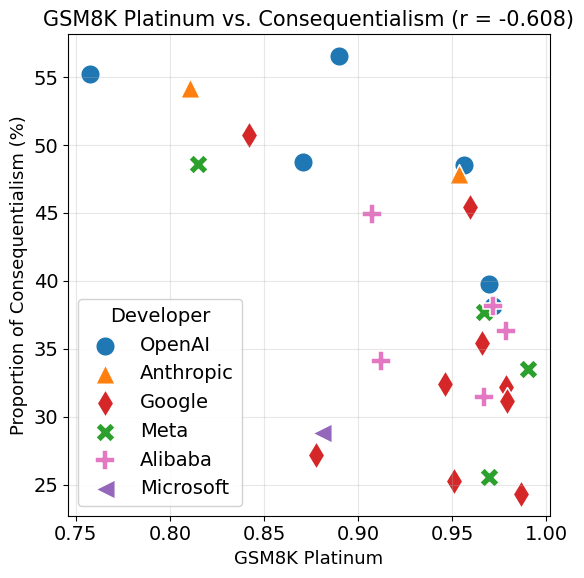

In [423]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

df_gsm8k = get_gsm8k_dataframe()
df = pd.merge(df_rationales, df_gsm8k[['model_id', 'gsm8k_score', 'gsm8k_std']], on='model_id')

# Example usage
plot_model_performance_vs_moral_feature(
    df,
    'Consequentialism',
    # 'Deontology',
    # 'Contractualism',
    performance_metric='GSM8K Platinum',
    developer_styles=DEVELOPER_STYLES,
    figsize=(6, 6),
    include_labels=False,
    # save_dir=f'{SAVE_DIR_BASE}/MLR-gsm8k_vs_consequentialism.pdf'
)

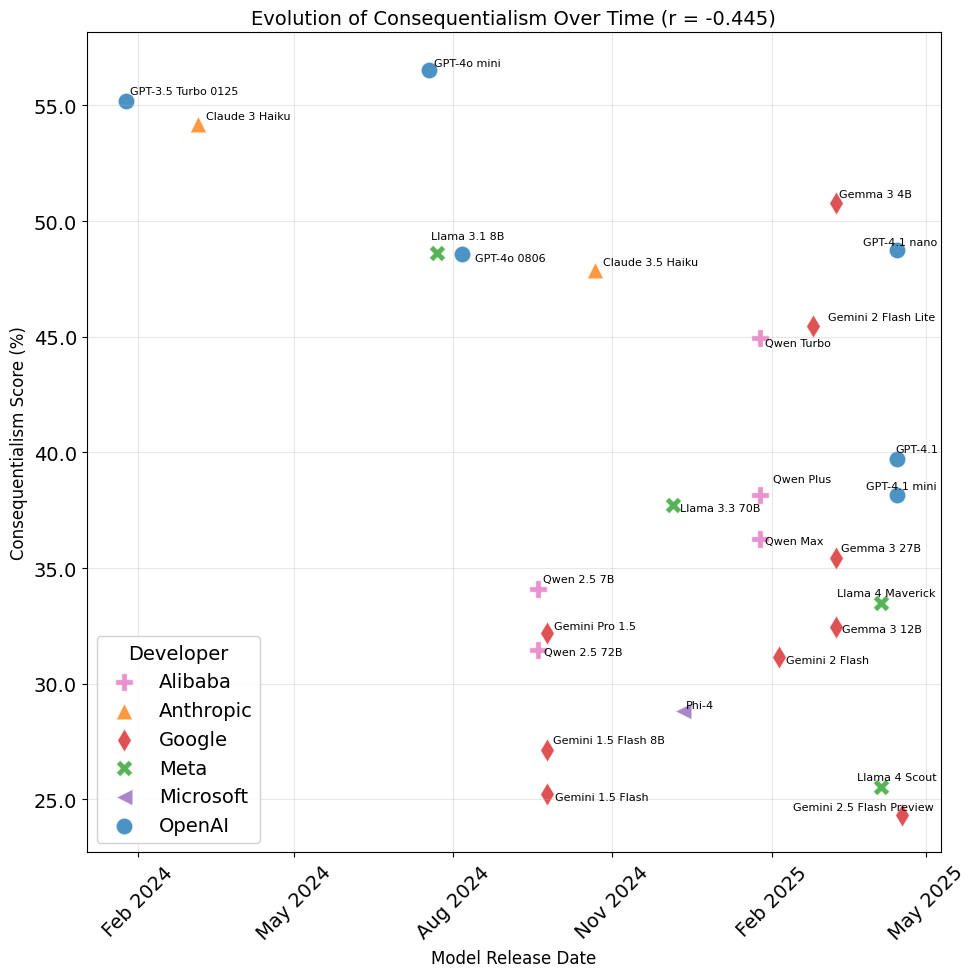

In [ ]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

plot_feature_over_time(
    df_rationales,
    'Consequentialism',
    # 'Deontology',
    # 'Contractualism',
    figsize=(10, 10),
    # save_dir=f'{FIGURE_SAVE_DIR}/MLR-time_vs_consequentialism.pdf',
    developer_styles=DEVELOPER_STYLES
)

In [361]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

file_paths = [fp for fp in glob(f"{RESULTS_DIR}/judge/*.csv")]
file_paths = [fp for fp in file_paths if any(model_id in fp.split('/')[-1].split('_')[0] for model_id in decision_model_ids)]
file_paths.sort(key=lambda x: next((i for i, model_id in enumerate(decision_model_ids) if model_id in x), len(decision_model_ids)))

# Use the function to process file paths and get model quality dataframe
model_quality_df = get_model_quality_df(file_paths, sort_quality=True)
model_quality_df


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,model_id,model_name,consistency,logic,bias,pluralism,acceptability,avg_quality,avg_quality_sans_pluralism
25,gemma-3-27b-it,Gemma 3 27B,0.642029,0.824638,0.044928,0.805072,0.955072,0.806703,0.807246
14,claude-3-haiku:beta,Claude 3 Haiku,0.648551,0.747101,0.168841,0.910870,0.831159,0.784420,0.742271
6,phi-4,Phi-4,0.385278,0.902114,0.016445,0.707126,0.983555,0.744518,0.756983
2,gpt-4.1-nano-2025-04-14,GPT-4.1 nano,0.730435,0.824638,0.206522,0.621014,0.793478,0.742391,0.782850
17,gemma-3-4b-it,Gemma 3 4B,0.628261,0.623913,0.210870,0.905072,0.789130,0.736594,0.680435
16,gemini-2.5-flash-preview,Gemini 2.5 Flash Preview,0.703136,0.930708,0.045222,0.333820,0.954778,0.730610,0.862874
11,qwen-plus,Qwen Plus,0.555069,0.895697,0.067834,0.539023,0.932166,0.730489,0.794311
15,llama-4-maverick,Llama 4 Maverick,0.493478,0.895652,0.018116,0.550725,0.981884,0.730435,0.790338
19,qwen-turbo,Qwen Turbo,0.578267,0.801672,0.123100,0.648936,0.876900,0.726444,0.752280
13,gemma-3-12b-it,Gemma 3 12B,0.603623,0.841304,0.057971,0.510145,0.942029,0.724275,0.795652


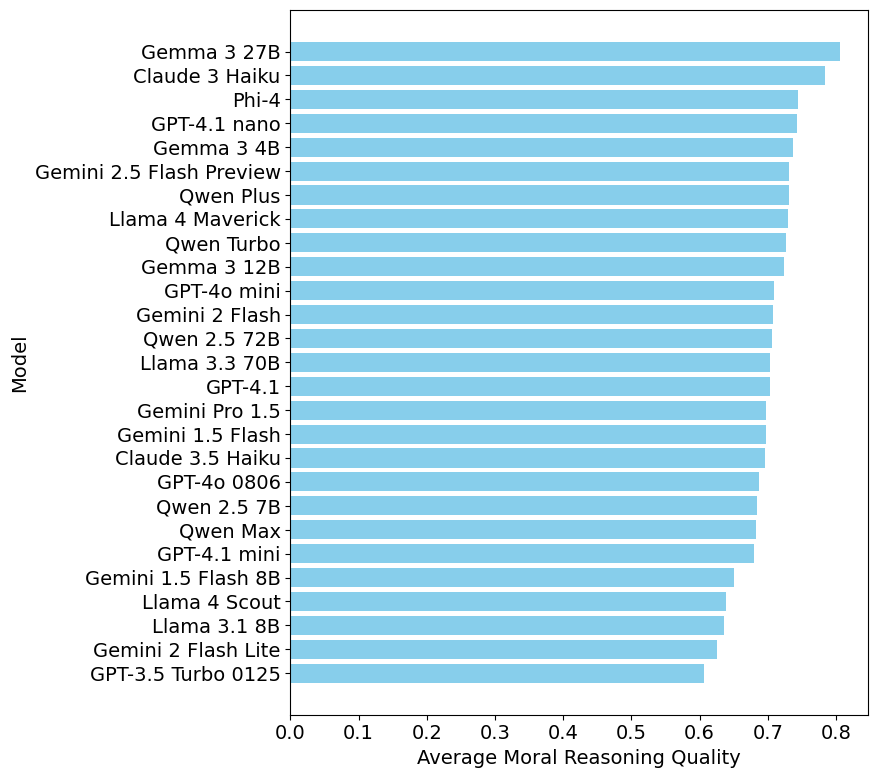

In [363]:
col = ['avg_quality', 'avg_quality_sans_pluralism'][0]
model_quality_df = model_quality_df.sort_values(by=col, ascending=False)

# Plot model_quality_df using matplotlib
plt.figure(figsize=(9, 8))
plt.barh(model_quality_df.iloc[::-1]['model_name'], model_quality_df.iloc[::-1][col], color='skyblue')
plt.xlabel("Average Moral Reasoning Quality" if col == 'avg_quality' else "Average Moral Reasoning Quality (sans pluralism)")
plt.ylabel("Model")
# plt.title("Model Quality Comparison")
plt.tight_layout()
plt.show()

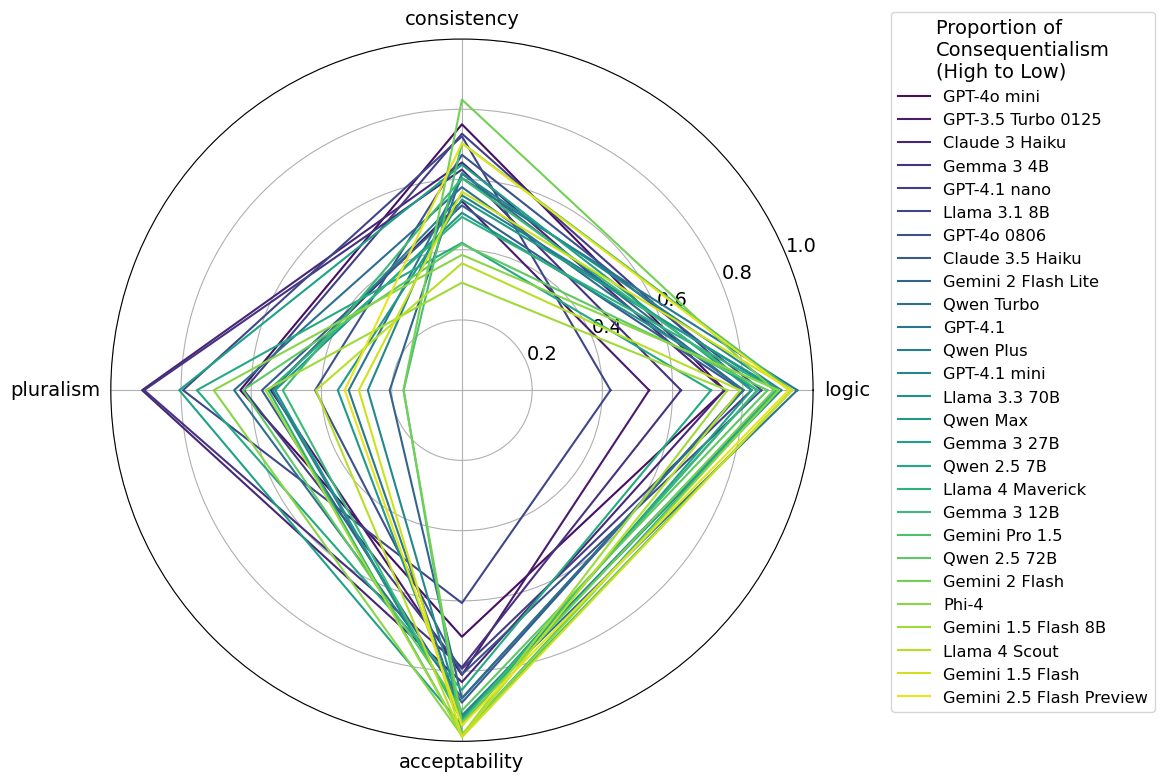

In [382]:
def create_model_quality_radar_plot(df, category_col='Consequentialism', legend_title=None, figsize=(12,12), save_dir=None):
    """
    Create a radar plot showing model quality metrics.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing model quality metrics
    category_col : str
        The column to sort the models by (default: 'Consequentialism')
    legend_title : str
        Title for the legend (default: 'Proportion of\nConsequentialism\n(High to Low)')

    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Sort the dataframe by the selected column
    df = df.sort_values(by=category_col, ascending=False)

    # Extract the data for the radar plot
    categories = ['logic', 'consistency', 'pluralism', 'acceptability']
    num_vars = len(categories)

    # Compute the angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    # Create the radar plot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))

    colors = sns.color_palette("viridis", len(df))

    # Plot each model
    for model_idx, (row_idx, row) in enumerate(df.iterrows()):
        values = row[categories].tolist()
        values += values[:1]  # Close the circle
        ax.plot(angles, values, label=df.iloc[row_idx]['model_name'], color=colors[model_idx])

    # Add labels and legend
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Adjust label positions for better readability
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        # Determine text alignment based on position in circle
        ha = 'right' if np.cos(angle) < -0.1 else 'left' if np.cos(angle) > 0.1 else 'center'
        va = 'top' if np.sin(angle) < -0.1 else 'bottom' if np.sin(angle) > 0.1 else 'center'

        # Set label position with improved alignment
        label_distance = 0.03  # Increase to push labels further out
        label.set_position((angle, 0.055-label_distance))
        label.set_ha(ha)
        label.set_va(va)

    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])
    # Set y-tick labels to 45 degree angle for better readability
    ax.set_ylim(0, 1)
    ax.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left', fontsize='small', title=legend_title, title_fontsize='medium')

    # plt.title("Radar Plot of Model Quality Metrics", size=16, y=1.1)

    plt.tight_layout()

    if save_dir:
        plt.savefig(save_dir, dpi=450, bbox_inches='tight')

    plt.show()

df = pd.merge(df_rationales, model_quality_df, on=['model_id', 'model_name'])

# Example usage
create_model_quality_radar_plot(
    df,
    category_col='Consequentialism',
    legend_title='Proportion of\nConsequentialism\n(High to Low)',
    # category_col='Deontology',
    # legend_title='Proportion of\nDeontology\n(High to Low)',
    # save_dir=f'{FIGURE_SAVE_DIR}/MLQ-consequentialism_radar_plot.pdf',
)
